#1数据预处理
##1.1数据整合
###1.1.1导入相关库和数据集

In [1]:
#导入模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#导入数据
data1= pd.read_csv(r'Basket-2018-06-01-2018-07-05.csv' )
data2= pd.read_csv(r'item-2018-06-01-2018-07-05.csv' )

###1.1.2数据概览
####1.1.2.1数据1预览

In [2]:
data1.shape

(571552, 5)

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571552 entries, 0 to 571551
Data columns (total 5 columns):
SHOP_DATETIME    571552 non-null object
STORE_CODE       571552 non-null object
POS_NO           571552 non-null int64
BASK_CODE        571552 non-null int64
BASK_SPEND       571552 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 21.8+ MB


In [4]:
data1.describe()

,POS_NO,BASK_CODE,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


从用户购买消费来看，平均值为39.58元，中位数为20元，最小值为0.01元，最大值为79920元。标准差为196，表明用户之间的消费差距浮动较大。在购买情况来看，服从长尾理论。

In [9]:
data1.head()

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018-06-01,D007,3,250458,8.0
1,2018-06-01,D007,3,250200,32.7
2,2018-06-01,D007,1,161068,16.8
3,2018-06-01,D007,8,5325,30.4
4,2018-06-01,D007,8,5361,191.3


####1.2.2数据2预览

In [10]:
data2.shape

(1732761, 10)

In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732761 entries, 0 to 1732760
Data columns (total 10 columns):
SDATE              object
STORE_CODE         object
POSID              int64
BASK_CODE          int64
PROD_CODE          int64
ITEM_QUANTITY      float64
ITEM_SPEND         float64
NORMAL_PRICE       float64
DISCOUNT_TYPE      object
DISCOUNT_AMOUNT    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 132.2+ MB


In [12]:
data2.describe()

,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06
mean,2.994959e+00,1.659824e+05,1.144861e+05,1.436702e+00,1.285536e+01,1.424412e+01,-1.624232e+00
std,2.470286e+00,8.583102e+04,8.161988e+04,7.015504e+00,1.022148e+02,2.403937e+01,5.160490e+01
min,1.000000e+00,9.610000e+02,1.900000e+01,-6.000000e+02,-3.594000e+04,5.000000e-01,-5.760000e+04
25%,1.000000e+00,8.995200e+04,2.183500e+04,1.000000e+00,3.800000e+00,3.800000e+00,-1.000000e+00
50%,2.000000e+00,1.758280e+05,1.233210e+05,1.000000e+00,7.000000e+00,7.800000e+00,0.000000e+00
75%,3.000000e+00,2.229530e+05,1.959930e+05,1.000000e+00,1.200000e+01,1.500000e+01,0.000000e+00
max,2.000000e+01,3.239140e+05,2.250470e+05,4.020000e+03,6.912000e+04,1.980000e+03,9.300000e+02


从商品单价来看，平均值为13元，最小值为0元，中位数为7元，最大值为69120元，标准差为9.33，说明价格有一定的浮动。 折扣幅度来看，平均折扣为1.6元，中位数为0元，最大折扣为57600元，最小幅度为涨价226元。

In [13]:
data2.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


#1.2数据清洗
##1.2.1列名重命名

In [14]:
#从上面发现表2中有列名不符合Python的命名规范，对列名进行一下重命名，采用下划线命名法：
data2.columns = ['SHOP_DATETIME','STORE_CODE','POS_NO','BASK_CODE','PROD_CODE','ITEM_QUANTITY','ITEM_SPEND','NORMAL_PRICE','DISCOUNT_TYPE','DISCOUNT_AMOUNT']

In [15]:
data2.columns

Index(['SHOP_DATETIME', 'STORE_CODE', 'POS_NO', 'BASK_CODE', 'PROD_CODE',
       'ITEM_QUANTITY', 'ITEM_SPEND', 'NORMAL_PRICE', 'DISCOUNT_TYPE',
       'DISCOUNT_AMOUNT'],
      dtype='object')

##1.2.2 数据类型处理

In [16]:
data1.dtypes

SHOP_DATETIME     object
STORE_CODE        object
POS_NO             int64
BASK_CODE          int64
BASK_SPEND       float64
dtype: object

In [17]:
data2.dtypes

SHOP_DATETIME       object
STORE_CODE          object
POS_NO               int64
BASK_CODE            int64
PROD_CODE            int64
ITEM_QUANTITY      float64
ITEM_SPEND         float64
NORMAL_PRICE       float64
DISCOUNT_TYPE       object
DISCOUNT_AMOUNT    float64
dtype: object

In [18]:
#从上面看到，大部分数据类型正确，不需要进行数据类型处理。但是购物日期应为datetime类型，需要进行处理。
data1["SHOP_DATETIME"] = pd.to_datetime(data1["SHOP_DATETIME"]) 
data1["SHOP_DATETIME"].sample(5)

342091   2018-07-01
135166   2018-07-01
94544    2018-06-09
150084   2018-06-03
467787   2018-06-16
Name: SHOP_DATETIME, dtype: datetime64[ns]

In [19]:
data2["SHOP_DATETIME"] = pd.to_datetime(data2["SHOP_DATETIME"]) 
data2["SHOP_DATETIME"].sample(5)

854649    2018-06-17
607024    2018-06-13
1596772   2018-07-03
1557313   2018-06-27
317664    2018-06-03
Name: SHOP_DATETIME, dtype: datetime64[ns]

##1.2.3增加列

In [20]:
#为了便于分析每年和每月的销售情况，增加年份列和月份列,给表2增加列：
data2['year'] = data2["SHOP_DATETIME"].dt.year
data2['month'] = data2['SHOP_DATETIME'].values.astype('datetime64[M]')

In [21]:
data2.head()

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT,year,month
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3,2018,2018-06-01
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0,2018,2018-06-01
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0,2018,2018-06-01
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9,2018,2018-06-01
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0,2018,2018-06-01


##1.2.4缺失值处理

In [22]:
#表1没有缺失值
data1.isnull().sum(axis=0)

SHOP_DATETIME    0
STORE_CODE       0
POS_NO           0
BASK_CODE        0
BASK_SPEND       0
dtype: int64

In [23]:
#表2也没有缺失值
data2.isnull().sum(axis=0)

SHOP_DATETIME      0
STORE_CODE         0
POS_NO             0
BASK_CODE          0
PROD_CODE          0
ITEM_QUANTITY      0
ITEM_SPEND         0
NORMAL_PRICE       0
DISCOUNT_TYPE      0
DISCOUNT_AMOUNT    0
year               0
month              0
dtype: int64

##1.2.5异常值处理

In [24]:
#表1没有异常值
data1.describe()

,POS_NO,BASK_CODE,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


In [25]:
#表2没有异常值
data2.describe()

,POS_NO,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT,year
count,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1732761.0
mean,2.994959e+00,1.659824e+05,1.144861e+05,1.436702e+00,1.285536e+01,1.424412e+01,-1.624232e+00,2018.0
std,2.470286e+00,8.583102e+04,8.161988e+04,7.015504e+00,1.022148e+02,2.403937e+01,5.160490e+01,0.0
min,1.000000e+00,9.610000e+02,1.900000e+01,-6.000000e+02,-3.594000e+04,5.000000e-01,-5.760000e+04,2018.0
25%,1.000000e+00,8.995200e+04,2.183500e+04,1.000000e+00,3.800000e+00,3.800000e+00,-1.000000e+00,2018.0
50%,2.000000e+00,1.758280e+05,1.233210e+05,1.000000e+00,7.000000e+00,7.800000e+00,0.000000e+00,2018.0
75%,3.000000e+00,2.229530e+05,1.959930e+05,1.000000e+00,1.200000e+01,1.500000e+01,0.000000e+00,2018.0
max,2.000000e+01,3.239140e+05,2.250470e+05,4.020000e+03,6.912000e+04,1.980000e+03,9.300000e+02,2018.0


In [26]:
data2.head()

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT,year,month
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3,2018,2018-06-01
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0,2018,2018-06-01
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0,2018,2018-06-01
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9,2018,2018-06-01
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0,2018,2018-06-01


#2数据分析
##2.1整体销售情况分析

In [29]:
# 整体销售情况子数据集，包含下单日期、销售额、销量、年份、月份信息
df_basket=data1
df_item=data2
sales_data = df_item[['SHOP_DATETIME','ITEM_SPEND','ITEM_QUANTITY','year','month']]
sales_data.sample(5)  

,SHOP_DATETIME,ITEM_SPEND,ITEM_QUANTITY,year,month
628392,2018-06-12,5.50,1.000,2018,2018-06-01
706431,2018-06-18,3.54,0.328,2018,2018-06-01
1597842,2018-07-05,5.80,1.000,2018,2018-07-01
382166,2018-06-10,4.80,1.000,2018,2018-06-01
1371534,2018-07-01,5.50,1.000,2018,2018-07-01


In [30]:
#按照月份对销售子数据集进行分组求和：
sales_month = df_item[['SHOP_DATETIME','ITEM_SPEND','month']]
sales_month = sales_month.groupby(['month','SHOP_DATETIME']).sum()
sales_month

ITEM_SPEND
month      SHOP_DATETIME            
2018-06-01 2018-06-01      717327.28
           2018-06-02      727910.16
           2018-06-03      682779.75
           2018-06-04      557813.05
           2018-06-05      663394.81
           2018-06-06      498250.71
           2018-06-07      436109.19
           2018-06-08      564402.27
           2018-06-09      679629.48
           2018-06-10      702961.56
           2018-06-11      532263.20
           2018-06-12      569290.86
           2018-06-13      722874.45
           2018-06-14      615684.90
           2018-06-15      774897.74
           2018-06-16     1172798.62
           2018-06-17     1506093.31
           2018-06-18     1257825.41
           2018-06-19      412881.99
           2018-06-20      533702.81
           2018-06-21      493064.51
           2018-06-22      411610.22
           2018-06-23      582622.57
           2018-06-24      529053.77
           2018-06-25      454961.04
           2018-06-26      453298.13
           2018-06-27      527871.74
           2018-06-28      438126.70
           2018-06-29      568749.99
           2018-06-30      719873.69
2018-07-01 2018-07-01      653284.63
           2018-07-02      520731.01
           2018-07-03      542603.77
           2018-07-04      559139.42
           2018-07-05      491390.33

##2.2销售额分析

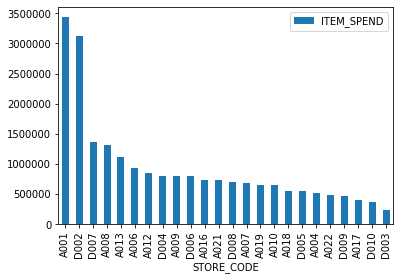

In [31]:
#门店销售额统计
storesales=df_item.groupby('STORE_CODE')['ITEM_SPEND'].sum().reset_index().sort_values(by = 'ITEM_SPEND',ascending = False)
# 绘制柱状图
storesales.set_index('STORE_CODE',inplace=True)
storesales.plot(kind='bar')
#可知门店编号为A001,D002,DOO7三家门店销售额排前三

In [32]:
#交易额前十的商品
df_item[df_item['ITEM_QUANTITY']>0].groupby('PROD_CODE')['ITEM_SPEND'].sum().sort_values(ascending=False).head(10)

PROD_CODE
7137      405783.50
7133      289784.00
136839    281211.40
149413    173820.33
1239      149153.20
154900    141034.70
220834    127622.90
21835     114483.25
88160     103467.20
3971       84972.00
Name: ITEM_SPEND, dtype: float64

##2.3商品销量分析

In [33]:
#购买商品数量前十的商品
df_item[df_item['ITEM_QUANTITY']>0].groupby('PROD_CODE')['ITEM_QUANTITY'].sum().sort_values(ascending=False).head(10)

PROD_CODE
149413    39931.00
86772     31365.00
220834    25704.00
7133      23028.00
61623     21828.00
124556    19907.00
205540    19313.00
1152      19183.00
194690    18151.51
124554    16681.00
Name: ITEM_QUANTITY, dtype: float64

In [34]:
#销售量前二十的日期
df_item[df_item['ITEM_QUANTITY']>0].groupby('SHOP_DATETIME')['ITEM_QUANTITY'].sum().sort_values(ascending=False).head(20)

SHOP_DATETIME
2018-06-17    152630.355
2018-06-18    144507.245
2018-06-16    121575.940
2018-06-13     89970.297
2018-06-15     86899.140
2018-06-03     80749.489
2018-06-02     79518.920
2018-06-01     78168.366
2018-06-10     77137.731
2018-06-30     76815.062
2018-07-01     73839.758
2018-06-14     72425.738
2018-06-27     71612.438
2018-07-03     71609.276
2018-06-05     70539.302
2018-07-04     69428.277
2018-06-09     68745.181
2018-07-02     67429.814
2018-06-23     63536.020
2018-06-29     63297.312
Name: ITEM_QUANTITY, dtype: float64

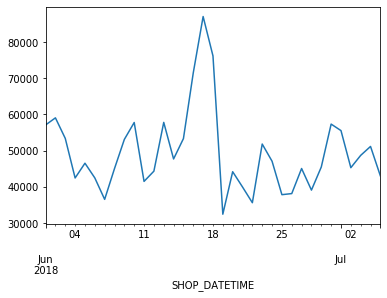

In [35]:
#销量折线图
df_item[df_item['ITEM_QUANTITY']>0].groupby('SHOP_DATETIME')['ITEM_QUANTITY'].count().plot()

In [36]:
#销量前二十的POS机
df_item[df_item['ITEM_QUANTITY']>0].groupby('POS_NO')['ITEM_QUANTITY'].sum().sort_values(ascending=False).head(20)

POS_NO
2     779564.745
1     695180.343
3     435843.591
6     162567.543
4     135897.075
8      92659.876
5      65617.899
9      62580.438
13     29136.659
20     16782.570
10     10988.000
7      10648.463
19      1824.064
Name: ITEM_QUANTITY, dtype: float64

In [37]:
#折扣前十的商品
df_item.groupby('PROD_CODE').sum()['DISCOUNT_AMOUNT'].sort_values(ascending=False).head(10)

PROD_CODE
95858     810.00
20534     504.00
211749    113.10
219181     72.00
197916     32.00
127587     15.80
60836      13.32
217575     13.02
125114     12.10
162948     11.92
Name: DISCOUNT_AMOUNT, dtype: float64

#2.4日期销售分布
##2.4.1按自然日

In [ ]:
# 整体销售情况子数据集，包含下单日期、销售额、销量、利润、年份、月份信息
sales_day = df_basket[['SHOP_DATETIME', 'BASK_SPEND']]
#按照年份、月份对销售子数据集进行分组求和
sales_day = sales_day.groupby(['SHOP_DATETIME']).sum()
sales_day.plot(kind='bar')

从上图可以看出，消费金额8月16-18日达到了高峰。其中在8月17日，销售额达到了最大值，之后消费金额呈下降趋势，并不断趋于平稳的状态。

##2.4.2按工作日

In [40]:
df_basket['daynameofweek']=df_basket['SHOP_DATETIME'].dt.weekday_name
df_basket.head()

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND,daynameofweek
0,2018-06-01,D007,3,250458,8.0,Friday
1,2018-06-01,D007,3,250200,32.7,Friday
2,2018-06-01,D007,1,161068,16.8,Friday
3,2018-06-01,D007,8,5325,30.4,Friday
4,2018-06-01,D007,8,5361,191.3,Friday


df_basket.daynameofweek.value_counts().plot(kind='bar')

通过对工作日销售笔数进行统计，可以看出周日周六为单数最大的两天。

小结：①可知门店编号为A001,D002,DOO7三家门店销售额排前三
②按照自然日统计销售金额，消费金额8月16-18日达到了高峰。其中在8月17日，销售额达到了最大值，之后消费金额呈下降趋势，并不断趋于平稳的状态。通过对工作日销售笔数进行统计，可以看出周日周六为单数最大的两天。

##2.5客户情况

In [43]:
#客单价
sumPrice=df[df['ITEM_QUANTITY']>0]['NORMAL_PRICE'].sum()
countID=df[df['ITEM_QUANTITY']>0]['BASK_CODE'].count()
avgPrice = sumPrice/countID
print(avgPrice)

14.218513331765855


In [45]:
# 客户消费分析
grouped_Customer = df_basket[['BASK_CODE','SHOP_DATETIME', 
          'BASK_SPEND']].sort_values(['SHOP_DATETIME']).groupby('BASK_CODE')
grouped_Customer.head()

,BASK_CODE,SHOP_DATETIME,BASK_SPEND
0,250458,2018-06-01,8.00
215287,161017,2018-06-01,9.90
215286,161158,2018-06-01,4.00
215285,250476,2018-06-01,86.40
215284,5399,2018-06-01,23.20
215283,5398,2018-06-01,28.73
215282,161038,2018-06-01,57.92
215281,250438,2018-06-01,67.20
215280,160962,2018-06-01,3.00
215279,35068,2018-06-01,86.70


In [46]:
# 用户消费金额、消费次数的描述统计(在此为平均每个用户平均消费金额，不是每笔平均消费金额)
grouped_Customer.count().describe()

,SHOP_DATETIME,BASK_SPEND
count,281211.000000,281211.000000
mean,2.032467,2.032467
std,1.078907,1.078907
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,7.000000,7.000000


In [47]:
grouped_Customer['BASK_SPEND'].sum().describe()

count    281211.000000
mean         79.211955
std         301.311749
min      -35866.100000
25%          20.490000
50%          48.780000
75%          98.500000
max       80064.900000
Name: BASK_SPEND, dtype: float64

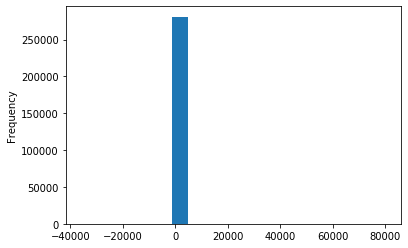

In [48]:
# 用户消费金额分布图
grouped_Customer.sum().BASK_SPEND.plot.hist(bins = 20)

可以看出用户消费金额大都集中在0-1000元以内,从上述直方图可以看出，用户消费金额，绝大部分是呈现集中趋势.

#2.6RFM模型

In [50]:
# RFM用户分层
rfm = df_basket.pivot_table(index = 'BASK_CODE',
                    values = ['STORE_CODE','BASK_SPEND','SHOP_DATETIME'],
                    aggfunc= {'BASK_CODE':'count',
                             'BASK_SPEND':'sum',
                             'SHOP_DATETIME':'max'})

In [51]:
rfm.head()

,BASK_CODE,BASK_SPEND,SHOP_DATETIME
BASK_CODE,,,
961,1,25.0,2018-06-18
962,1,132.1,2018-06-18
964,1,28.0,2018-06-18
965,1,40.0,2018-06-18
966,1,12.5,2018-06-18


In [52]:
rfm['R'] = (rfm.SHOP_DATETIME.max() - rfm.SHOP_DATETIME) / np.timedelta64(1,'D')
rfm.rename(columns={'BASK_CODE':'F','BASK_SPEND':'M'},inplace = True)

In [54]:
rfm.head()

,F,M,SHOP_DATETIME,R
BASK_CODE,,,,
961,1,25.0,2018-06-18,17.0
962,1,132.1,2018-06-18,17.0
964,1,28.0,2018-06-18,17.0
965,1,40.0,2018-06-18,17.0
966,1,12.5,2018-06-18,17.0


In [55]:
#建立模型
def rfm_func(x):
    level = x.apply(lambda x:'1' if x > 0 else '0')
    label = level.R +level.F + level.M
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'一般挽留客户'
    }
    result = d[label]
    return result
rfm['label'] = rfm[['R','F','M']].apply(lambda x : x - x.mean()).apply(rfm_func,axis=1)

In [56]:
rfm.groupby('label').sum()

,F,M,R
label,,,
一般价值客户,24019,374125.29,135441.0
一般保持客户,78061,1146063.10,121111.0
一般发展客户,116561,2497110.14,1955435.0
一般挽留客户,102449,1925579.45,391856.0
重要价值客户,36769,1957341.85,193076.0
重要保持客户,145815,7571557.27,190726.0
重要发展客户,35576,3785722.93,462480.0
重要挽留客户,32302,3017773.04,95092.0


In [57]:
rfm.groupby('label').count()

,F,M,SHOP_DATETIME,R
label,,,,
一般价值客户,7619,7619,7619,7619
一般保持客户,24237,24237,24237,24237
一般发展客户,89197,89197,89197,89197
一般挽留客户,68979,68979,68979,68979
重要价值客户,10995,10995,10995,10995
重要保持客户,39816,39816,39816,39816
重要发展客户,22288,22288,22288,22288
重要挽留客户,18080,18080,18080,18080


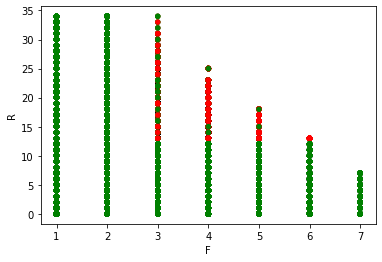

In [58]:
rfm.loc[rfm.label == '重要价值客户','color'] = 'r'
rfm.loc[rfm.label != '重要价值客户','color'] = 'g'
rfm.plot.scatter('F','R',c = rfm.color)

RFM分层结果不明确，无法明显看出用户分层。但重要保持用户可以看出为最大群体。